In [ ]:
import random
import math
import matplotlib.pyplot as plt

In [ ]:
def calculate_next_position(x, y, px, py, radius):
    a = px**2 + py**2
    b = 2 * (x * px + y * py)
    c = x**2 + y**2 - radius**2

    discriminant = b**2 - 4 * a * c

    if discriminant < 0:
        return None  # No intersection, return None

    t1 = (-b + math.sqrt(discriminant)) / (2 * a)
    t2 = (-b - math.sqrt(discriminant)) / (2 * a)

    if t1 >= 0.0:
        t = t1
    elif t2 >= 0.0:
        t = t2
    else:
        return None  # No positive intersection time, return None

    x_new = x + px * t
    y_new = y + py * t - 0.5 * 10 * t**2

    return x_new, y_new

In [ ]:
def calculate_reflected_momentum(x, y, px, py):
    p_x = (y**2 - x**2) * px - 2 * x * y * py
    p_y = -2 * x * y * px + (x**2 - y**2) * py
    return p_x, p_y

In [ ]:
def simulate_vertical_circular_billiard(n):
    radius = 1.0

    x = random.uniform(-radius, radius)
    y = random.uniform(-math.sqrt(radius**2 - x**2), math.sqrt(radius**2 - x**2))
    magnitude_p = random.uniform(5, 10)
    theta = random.uniform(0, 2 * math.pi)
    px = magnitude_p * math.cos(theta)
    py = magnitude_p * math.sin(theta)

    reflection_points = [(x, y)]

    for _ in range(n):
        next_pos = calculate_next_position(x, y, px, py, radius)

        if next_pos is None:
            break  # No valid next position, exit the loop

        x_new, y_new = next_pos

        reflected_momentum = calculate_reflected_momentum(x_new, y_new, px, py)
        px, py = reflected_momentum

        x, y = x_new, y_new
        reflection_points.append((x, y))

    return reflection_points

In [ ]:
def test_reversibility(reflection_points, delta):
    reversed_momentum = lambda px, py: (-px, -py)
    reversed_path = []

    for i in range(len(reflection_points)):
        x, y = reflection_points[i]
        px, py = reversed_momentum(reflection_points[-i-1][0], reflection_points[-i-1][1])

        next_pos = calculate_next_position(x, y, px, py, 1.0)

        if next_pos is None:
            break  # No valid next position, exit the loop

        reversed_path.append(next_pos)

    deviation_index = None
    for i in range(len(reflection_points)):
        x1, y1 = reflection_points[i]
        x2, y2 = reversed_path[i]

        deviation = math.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        if deviation > delta:
            deviation_index = i
            break

    return deviation_index

In [ ]:
def draw_path(reflection_points, color):
    x_vals = [point[0] for point in reflection_points]
    y_vals = [point[1] for point in reflection_points]

    plt.plot(x_vals, y_vals, color=color)

In [ ]:
def run_simulation(n, delta):
    reflection_points = simulate_vertical_circular_billiard(n)

    plt.figure(figsize=(6, 6))
    draw_path(reflection_points, 'red')

    deviation_index = test_reversibility(reflection_points, delta)

    if deviation_index is not None:
        reversed_points = reflection_points[:deviation_index]
        draw_path(reversed_points, 'blue')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Vertical Circular Billiard Simulation')
    plt.axis('equal')
    plt.show()

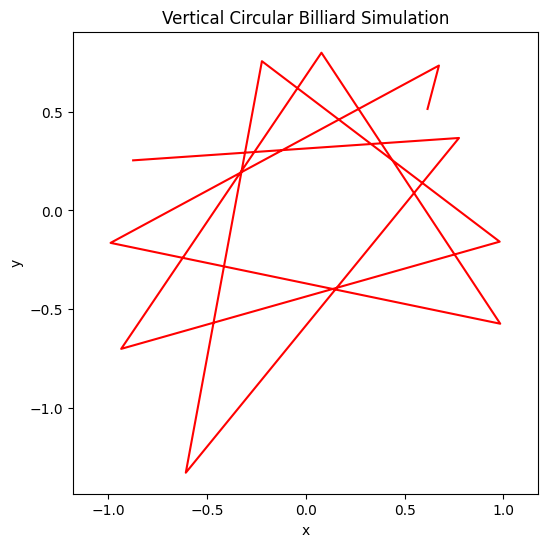

In [ ]:
run_simulation(10, 1e-6)

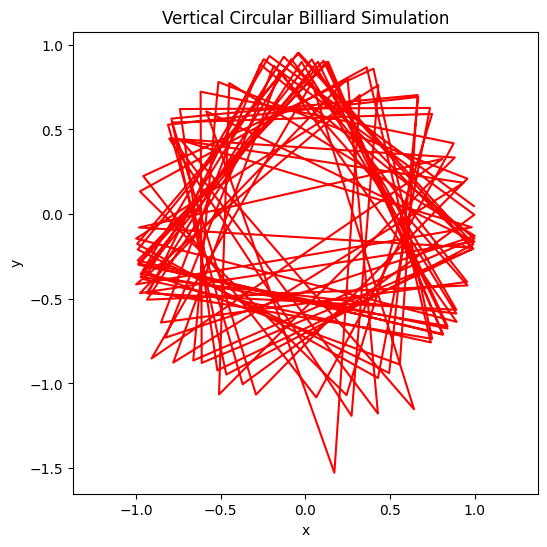

In [ ]:
run_simulation(100, 1e-6)

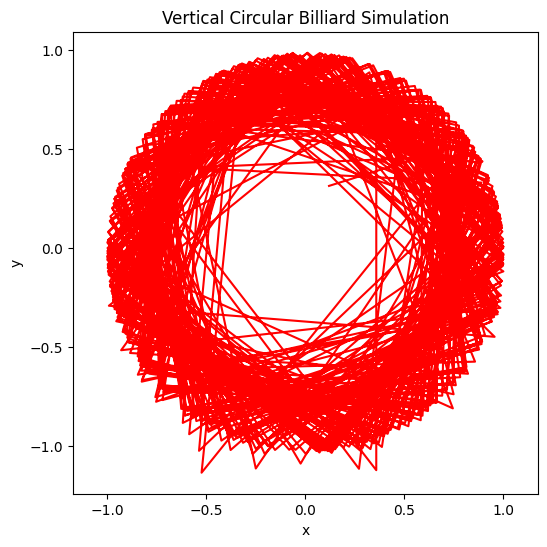

In [ ]:
run_simulation(500, 1e-6)